# 1. Import the libraries

In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow import keras
import matplotlib.pyplot as plt
import random

# 2. Load dataset

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


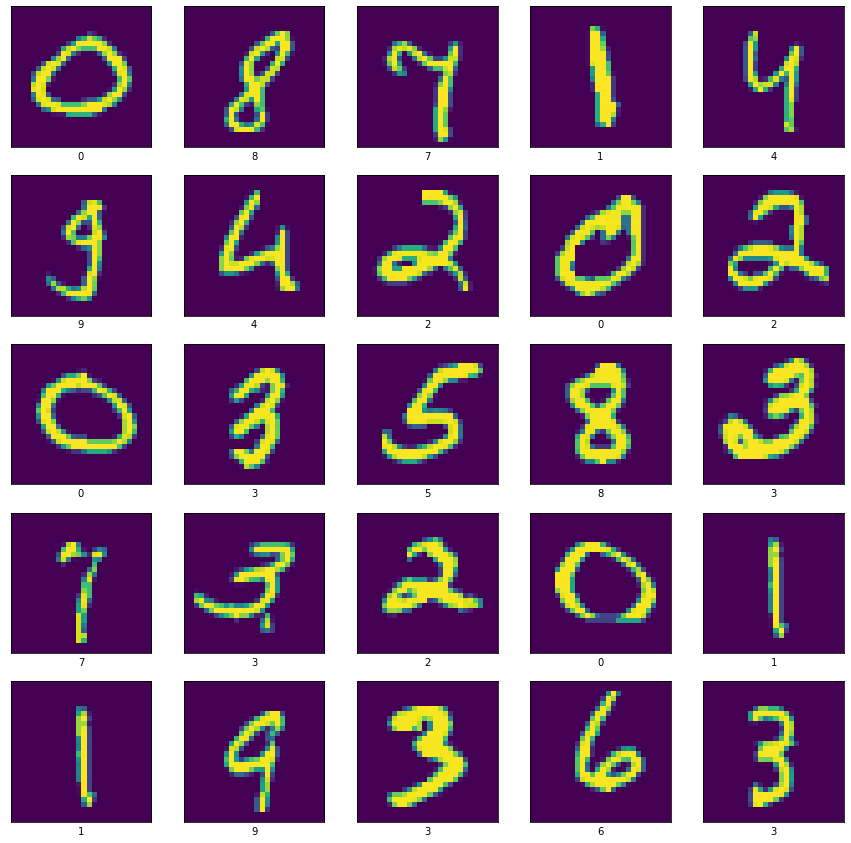

In [3]:
# Plot random samples and corresponding class

plt.figure(figsize=(15,15))
for ii in range(0, 25):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    randno = random.randint(0, x_train.shape[0])
    plt.imshow(x_train[randno])
    plt.xlabel(y_train[randno])

# 2. Preprocess the data

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3. Create the model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #to flatten the array without explicitly flattening  
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
earlystopping_callback = EarlyStopping(monitor='val_loss', 
                                       min_delta=0, 
                                       patience=10, 
                                       verbose=0, 
                                       mode='auto', 
                                       baseline=None, 
                                       restore_best_weights=True)

# 4. Train the model

In [10]:
batch_size  = 128
epochs      = 20
history = model.fit(x_train, 
                    y_train, 
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(x_test, y_test),
                    callbacks=earlystopping_callback)
print("The model has successfully trained")

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2533 - accuracy: 0.9263 - val_loss: 0.1232 - val_accuracy: 0.9637
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1076 - accuracy: 0.9682 - val_loss: 0.0900 - val_accuracy: 0.9716
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 0.0718 - val_accuracy: 0.9780
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0696 - val_accuracy: 0.9777
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0625 - val_accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0669 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0648 - val_accuracy:

In [11]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0026 - accuracy: 0.9995


[0.002564904512837529, 0.9994833469390869]

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9833


[0.07640545070171356, 0.983299970626831]

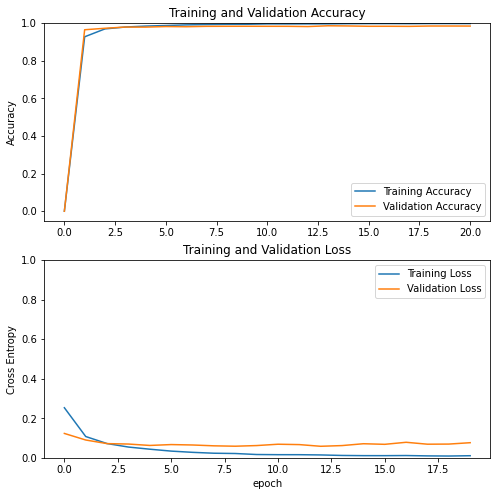

In [14]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
y_predict = model.predict(x_test)
y_predict.shape

(10000, 10)

In [16]:
import numpy as np
y_predict_labels = [np.argmax(ii) for ii in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test_labels = [np.argmax(ii) for ii in y_test]

Text(114.0, 0.5, 'Truth')

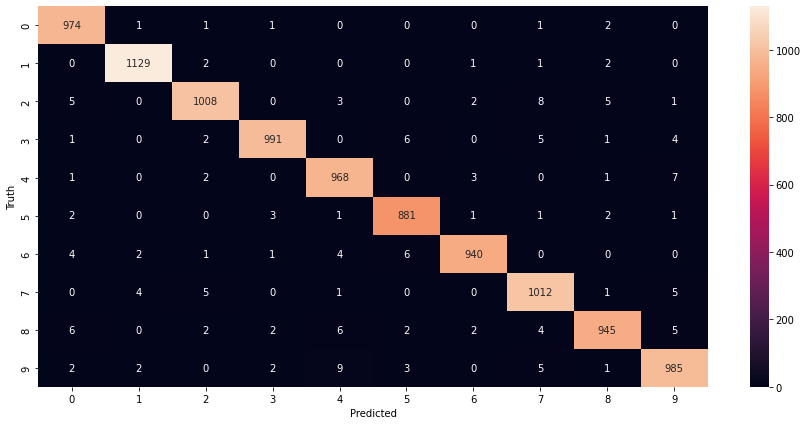

In [19]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions = y_predict_labels)
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

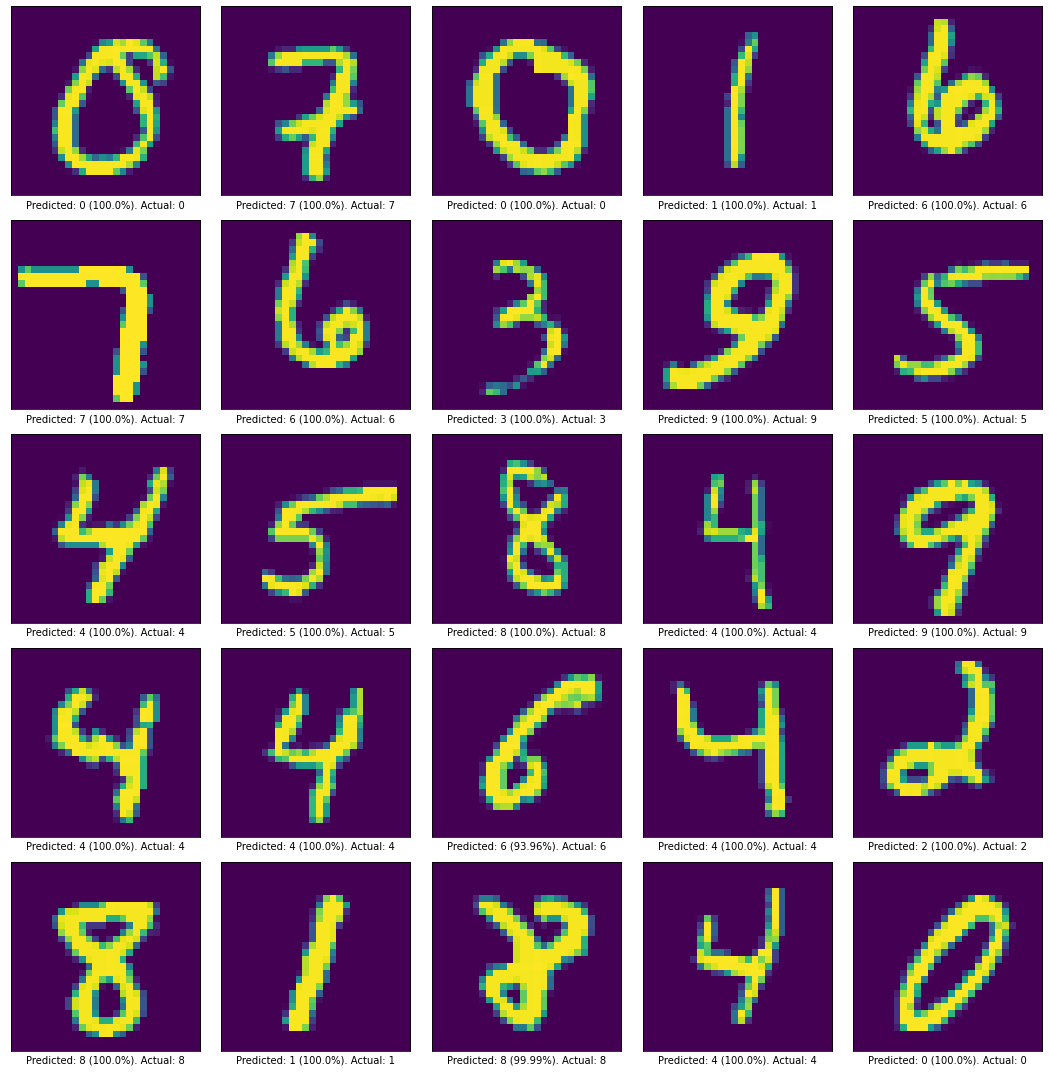

In [25]:
# Plot random sample to check predictions

plt.figure(figsize=(15,15))
nn = 25
for ii in range(0, nn):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    randno = random.randint(0, (len(x_test)-1))
    plt.imshow(x_test[randno])
    plt.tight_layout()
    if y_predict_labels[randno] == y_test_labels[randno]:
        color = 'black'
    else:
        color = 'red'
    plt.xlabel('Predicted: ' + str(y_predict_labels[randno]) + ' (' +
              str(round(100*np.max(y_predict[randno]), 2)) + "%). " +
               "Actual: " + str(y_test_labels[randno]), color = color, fontsize = 10)

In [26]:
import os
model_path   = os.getcwd() + "/model/digit_model"

In [27]:
model_path

'/home/user/AI_World/AI_Projects/Digits_Recognition/model/digit_model'

In [28]:
model.save(model_path+".h5")  #h5 format

In [29]:
model.save(model_path)

2021-12-29 22:46:49.657265: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/user/AI_World/AI_Projects/Digits_Recognition/model/digit_model/assets
